In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
import pandas_profiling as pp
import sweetviz
import math

## We have imported the necessary packages to do the analysis

## Next we get the dataset from the local dataset

In [80]:
df=pd.read_csv("zomato_dataset.csv",header=0)

## first 5 rows of the dataset

In [81]:
df.head()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name        City                 Item Name  \
0               0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best Seller  Votes  Prices  
0  BESTSELLER     84   249.0  
1  BESTSELLER     45   129.0  
2         NaN     39   189.0  
3  BESTSELLER     43   189.0  
4    MUST TRY     31   205.0

## last 5 rows

In [82]:
df.tail()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
123652  Ariena Boutique Hotel            3.9              4.2            13   
123653  Ariena Boutique Hotel            3.9              4.2            13   
123654  Ariena Boutique Hotel            3.9              4.2            13   
123655  Ariena Boutique Hotel            3.9              4.2            13   
123656  Ariena Boutique Hotel            3.9              4.2            13   

        Delivery Votes Cuisine  Place Name     City              Item Name  \
123652             523    Pizza     Purena   Raipur     Murgh Reshmi Kebab   
123653             523    Pizza     Purena   Raipur      Murgh Large Tikka   
123654             523    Pizza     Purena   Raipur  Murgh Chukandri Tikka   
123655             523    Pizza     Purena   Raipur     Murgh Golden Kebab   
123656             523    Pizza     Purena   Raipur     Gosht Gilawat Chop   

       Best Seller  Votes  Prices  
123652         NaN      0   525.0  
123653         NaN      0   525.0  
123654         NaN      0   525.0  
123655         NaN      0   525.0  
123656  BESTSELLER      0   595.0

# data preparation

## we detect duplicated columns and correct it

In [83]:
# Identify duplicate columns
duplicate_cols = df.columns.duplicated()

# Drop duplicate columns
df = df.loc[:, ~duplicate_cols]
df

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0                  Doner King            3.9              4.2            39   
1                  Doner King            3.9              4.2            39   
2                  Doner King            3.9              4.2            39   
3                  Doner King            3.9              4.2            39   
4                  Doner King            3.9              4.2            39   
...                       ...            ...              ...           ...   
123652  Ariena Boutique Hotel            3.9              4.2            13   
123653  Ariena Boutique Hotel            3.9              4.2            13   
123654  Ariena Boutique Hotel            3.9              4.2            13   
123655  Ariena Boutique Hotel            3.9              4.2            13   
123656  Ariena Boutique Hotel            3.9              4.2            13   

        Delivery Votes   Cuisine  Place Name        City  \
0                    0  Fast Food   Malakpet   Hyderabad   
1                    0  Fast Food   Malakpet   Hyderabad   
2                    0  Fast Food   Malakpet   Hyderabad   
3                    0  Fast Food   Malakpet   Hyderabad   
4                    0  Fast Food   Malakpet   Hyderabad   
...                ...        ...        ...         ...   
123652             523      Pizza     Purena      Raipur   
123653             523      Pizza     Purena      Raipur   
123654             523      Pizza     Purena      Raipur   
123655             523      Pizza     Purena      Raipur   
123656             523      Pizza     Purena      Raipur   

                       Item Name Best Seller  Votes  Prices  
0            Platter Kebab Combo  BESTSELLER     84   249.0  
1        Chicken Rumali Shawarma  BESTSELLER     45   129.0  
2         Chicken Tandoori Salad         NaN     39   189.0  
3              Chicken BBQ Salad  BESTSELLER     43   189.0  
4       Special Doner Wrap Combo    MUST TRY     31   205.0  
...                          ...         ...    ...     ...  
123652        Murgh Reshmi Kebab         NaN      0   525.0  
123653         Murgh Large Tikka         NaN      0   525.0  
123654     Murgh Chukandri Tikka         NaN      0   525.0  
123655        Murgh Golden Kebab         NaN      0   525.0  
123656        Gosht Gilawat Chop  BESTSELLER      0   595.0  

[123657 rows x 12 columns]

In [84]:
df=df.drop_duplicates()

## dataset shape

In [85]:
df.shape

(101530, 12)

## dataset info

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101530 entries, 0 to 123635
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  101530 non-null  object 
 1   Dining Rating    74572 non-null   float64
 2   Delivery Rating  100286 non-null  float64
 3   Dining Votes     101530 non-null  int64  
 4   Delivery Votes   101530 non-null  int64  
 5   Cuisine          101530 non-null  object 
 6   Place Name       101530 non-null  object 
 7   City             101530 non-null  object 
 8   Item Name        101530 non-null  object 
 9   Best Seller      19143 non-null   object 
 10  Votes            101530 non-null  int64  
 11  Prices           101530 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 10.1+ MB


## Restoring values correctly by stripping it.

In [87]:
def sh(col):
    df[col]=df[col].str.strip()

In [88]:
sh("Restaurant Name")
sh("Cuisine ")
sh("Place Name")
sh("City")
sh("Item Name")
sh("Best Seller")

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_17280\2182141491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.strip()


## Next we do imputation in the datset

In [89]:
df.isnull().sum()

Restaurant Name        0
Dining Rating      26958
Delivery Rating     1244
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        82387
Votes                  0
Prices                 0
dtype: int64

## we analyze the skewness of the Dining rate so that we can decide whether we can use median or mean to fill the null values

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_17280\276008510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Dining Rating"])


<Axes: xlabel='Dining Rating', ylabel='Density'>

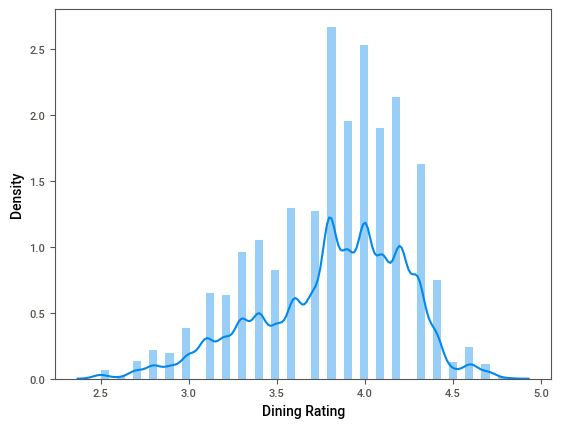

In [90]:
sns.distplot(df["Dining Rating"])

## pearson skewness to check the skewness

In [91]:
def skewvalid(col):
    #print(col.head())
    m1=col.median()
    m2=col.mean()
    m3=col.std()
    return 3*((m2-m1)/m3)

In [92]:
p1=skewvalid(df["Dining Rating"])
p1

-0.5797375954366699

## the skweness is mediocre so we use mean.

In [93]:
r=df["Dining Rating"].mean()
round(r,1)

3.8

In [94]:
df["Dining Rating"].fillna(round(r,1),inplace=True)

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_17280\4197186286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dining Rating"].fillna(round(r,1),inplace=True)


In [95]:
df.isnull().sum()

Restaurant Name        0
Dining Rating          0
Delivery Rating     1244
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        82387
Votes                  0
Prices                 0
dtype: int64

## Now we do the same for Delivery rating

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_17280\3216823001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Delivery Rating"])


<Axes: xlabel='Delivery Rating', ylabel='Density'>

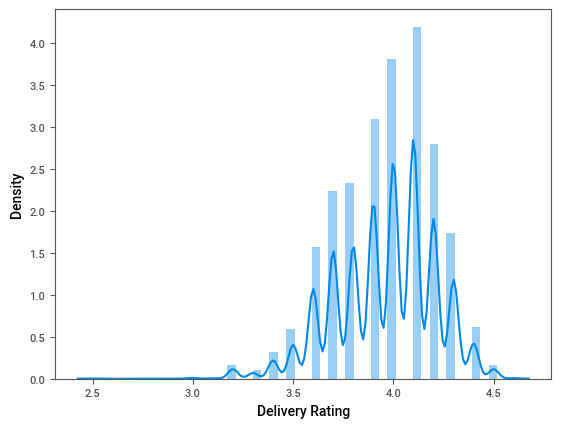

In [97]:
sns.distplot(df["Delivery Rating"])

In [98]:
p2=skewvalid(df["Delivery Rating"])
p2

-0.4926517022540743

In [99]:
r2=df["Delivery Rating"].mean()
df["Delivery Rating"].fillna(round(r2,1),inplace=True)

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_17280\1330755521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Delivery Rating"].fillna(round(r2,1),inplace=True)


In [100]:
df.isnull().sum()

Restaurant Name        0
Dining Rating          0
Delivery Rating        0
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        82387
Votes                  0
Prices                 0
dtype: int64

## The columns Dining rating and Delivery rating null values has been filled but now I have Best seller column which has null values covering 75 % of the column so I can drop the column but instead I'm filling the null values as "Regular order" in the datset 

In [101]:
df["Best Seller"].value_counts()

BESTSELLER                  9884
MUST TRY                    4106
Not eligible for coupons    1743
CHEF'S SPECIAL              1332
SPICY                        993
Not on Pro                   564
NEW                          375
SEASONAL                      82
Eggless available             28
VEGAN                         20
GLUTEN FREE                    8
FODMAP FRIENDLY                6
DAIRY FREE                     2
Name: Best Seller, dtype: int64

In [102]:
df["Special mentions"]=df["Best Seller"]

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_17280\2590144570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Special mentions"]=df["Best Seller"]


In [103]:
df=df.drop("Best Seller",axis=1)

In [104]:
df["Special mentions"]=df["Special mentions"].fillna("Regular")

In [105]:
df.isnull().sum()

Restaurant Name     0
Dining Rating       0
Delivery Rating     0
Dining Votes        0
Delivery Votes      0
Cuisine             0
Place Name          0
City                0
Item Name           0
Votes               0
Prices              0
Special mentions    0
dtype: int64

 ## now we did necessary imputations and now we can procide with futher analysis

## Finding unique values in the dataset

In [106]:
df.nunique()

Restaurant Name       826
Dining Rating          24
Delivery Rating        18
Dining Votes          294
Delivery Votes        263
Cuisine                48
Place Name            324
City                   17
Item Name           55693
Votes                 760
Prices               2710
Special mentions       14
dtype: int64

## describing the dataset using describe function

In [107]:
df.describe(include="all")

Restaurant Name  Dining Rating  Delivery Rating   Dining Votes  \
count           101530  101530.000000    101530.000000  101530.000000   
unique             826            NaN              NaN            NaN   
top         McDonald's            NaN              NaN            NaN   
freq              1526            NaN              NaN            NaN   
mean               NaN       3.815473         3.960016     151.559726   
std                NaN       0.350181         0.245030     230.662157   
min                NaN       2.500000         2.500000       0.000000   
25%                NaN       3.700000         3.800000       0.000000   
50%                NaN       3.800000         4.000000      30.000000   
75%                NaN       4.000000         4.100000     221.000000   
max                NaN       4.800000         4.600000     997.000000   

        Delivery Votes   Cuisine  Place Name       City       Item Name  \
count    101530.000000     101530     101530     101530          101530   
unique             NaN         48        324         17           55693   
top                NaN  Beverages   C Scheme  Hyderabad  Veg Fried Rice   
freq               NaN      32818       2879      13100             247   
mean        116.704009        NaN        NaN        NaN             NaN   
std         243.856446        NaN        NaN        NaN             NaN   
min           0.000000        NaN        NaN        NaN             NaN   
25%           0.000000        NaN        NaN        NaN             NaN   
50%           0.000000        NaN        NaN        NaN             NaN   
75%          37.000000        NaN        NaN        NaN             NaN   
max         983.000000        NaN        NaN        NaN             NaN   

                Votes         Prices Special mentions  
count   101530.000000  101530.000000           101530  
unique            NaN            NaN               14  
top               NaN            NaN          Regular  
freq              NaN            NaN            82387  
mean        19.110371     243.690758              NaN  
std        108.264166     197.534461              NaN  
min          0.000000       0.950000              NaN  
25%          0.000000     130.000000              NaN  
50%          0.000000     209.000000              NaN  
75%         10.000000     299.000000              NaN  
max       9750.000000   12024.000000              NaN

# Visualizations

## Univariate analysis

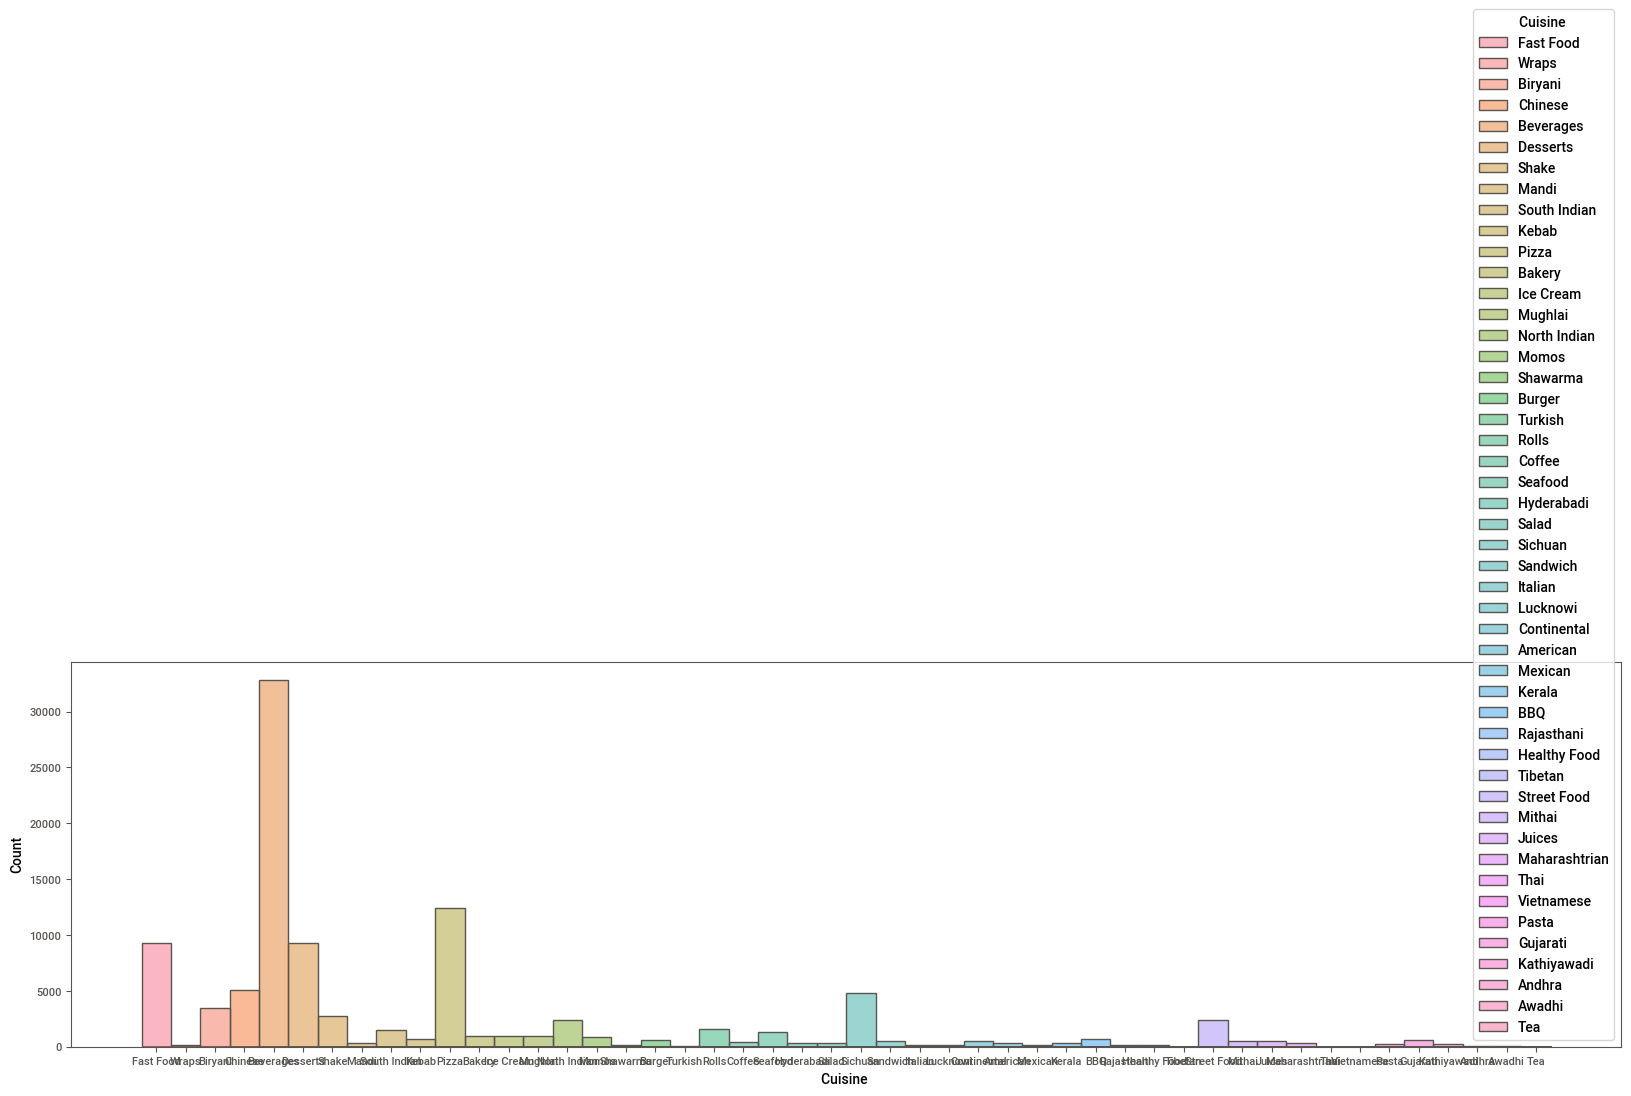

In [108]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,x="Cuisine ",hue="Cuisine ")
plt.show()

## the sales of beverages is more compared to other dishes

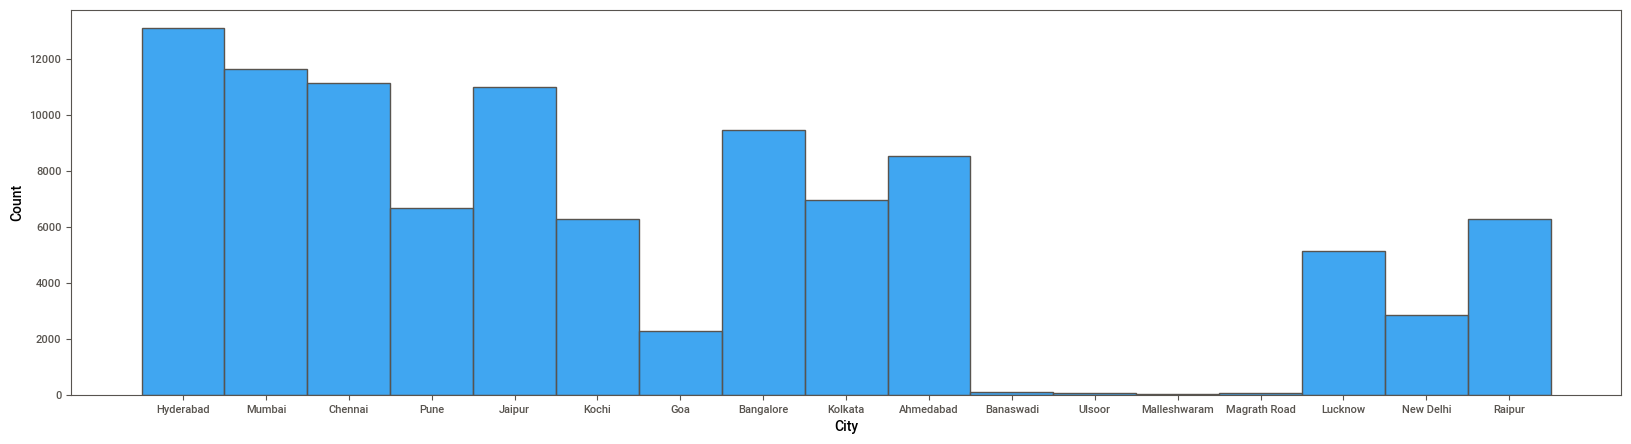

In [109]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,x="City")
plt.show()

## Hyderbad, chennai, mumbai, pune, jaipur, Kochi, Banglore, kolkata, Ahmedabad has more orders

<Axes: xlabel='Special mentions', ylabel='Count'>

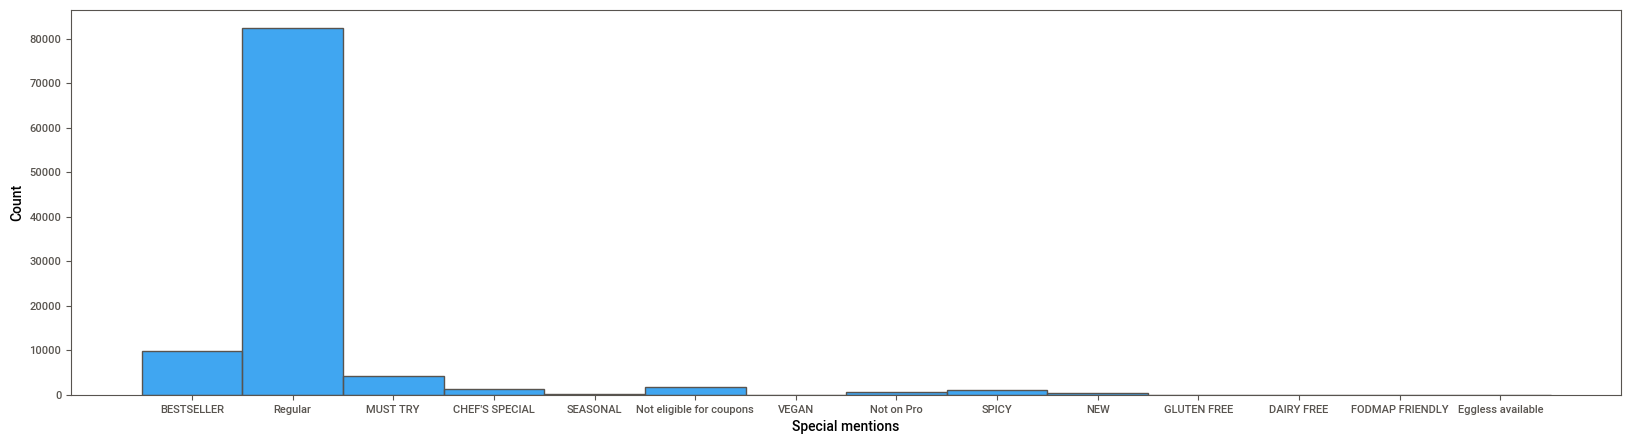

In [110]:
plt.figure(figsize=(20,5))

sns.histplot(df["Special mentions"])

## People prefer Bestseller mentions after regular options followed by must try.

## city wise analysis on major cities where zomato orders are more.

## For hyderabad

In [111]:
df_hyderabad=df[df["City"]=="Hyderabad"]

In [112]:
df_hyderabad.head()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name       City                 Item Name  \
0               0  Fast Food   Malakpet  Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet  Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet  Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet  Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet  Hyderabad  Special Doner Wrap Combo   

   Votes  Prices Special mentions  
0     84   249.0       BESTSELLER  
1     45   129.0       BESTSELLER  
2     39   189.0          Regular  
3     43   189.0       BESTSELLER  
4     31   205.0         MUST TRY

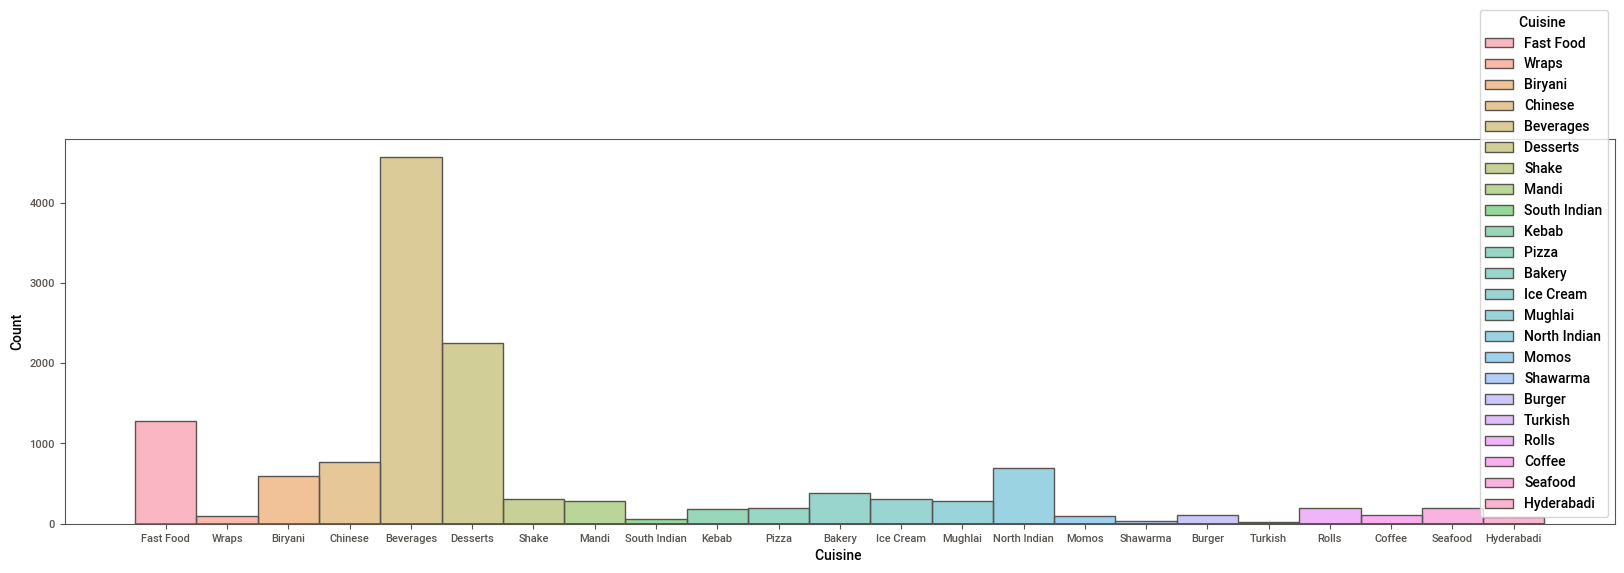

In [113]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_hyderabad,x="Cuisine ",hue="Cuisine ")
plt.show()

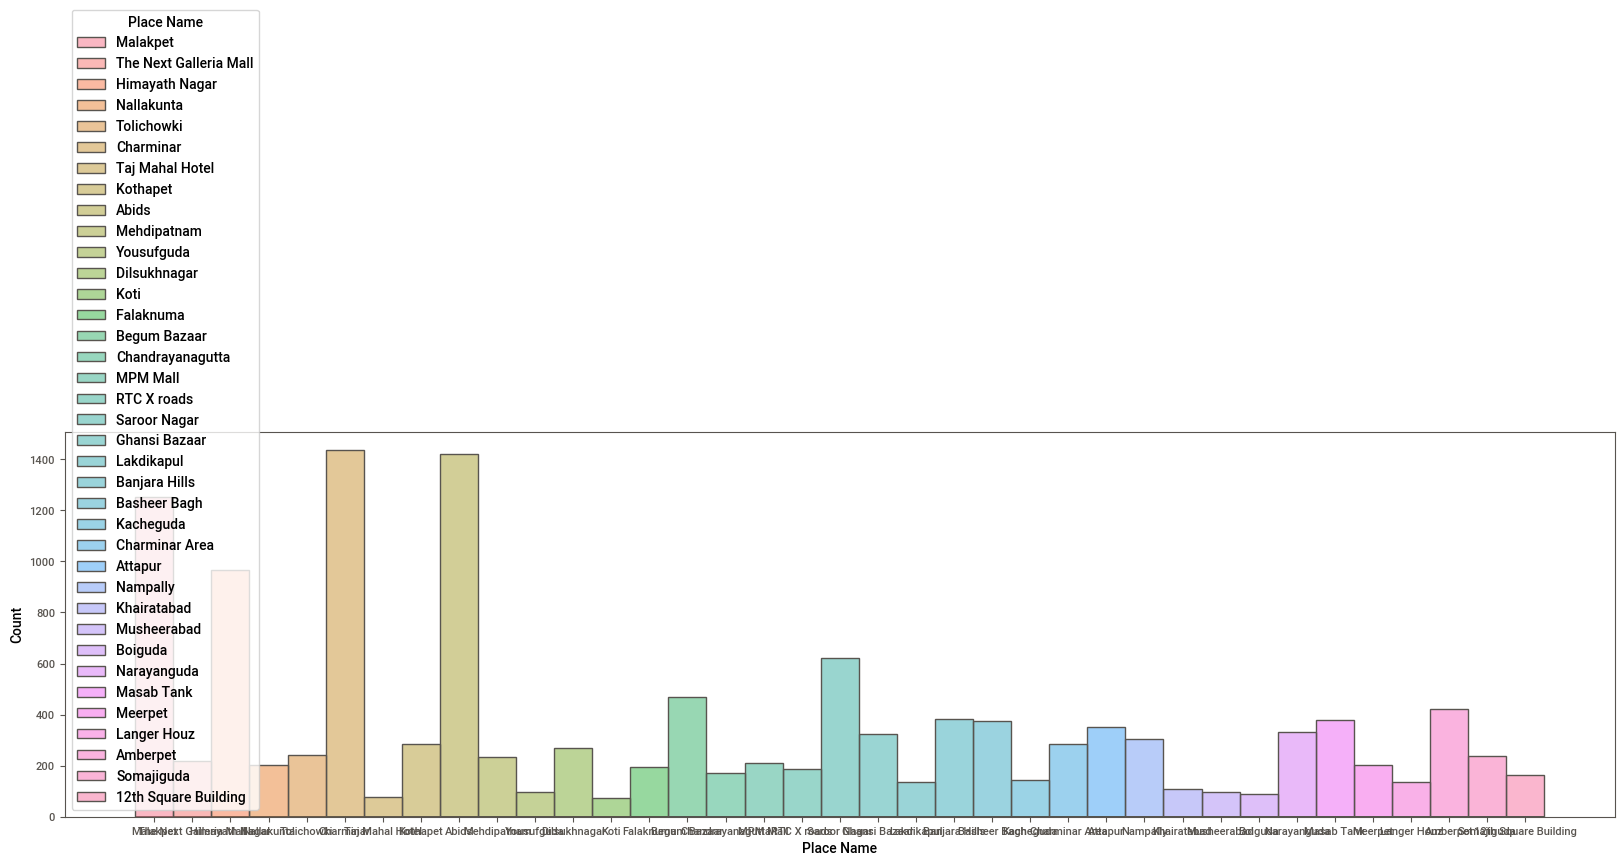

In [114]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_hyderabad,x="Place Name",hue="Place Name")
plt.show()

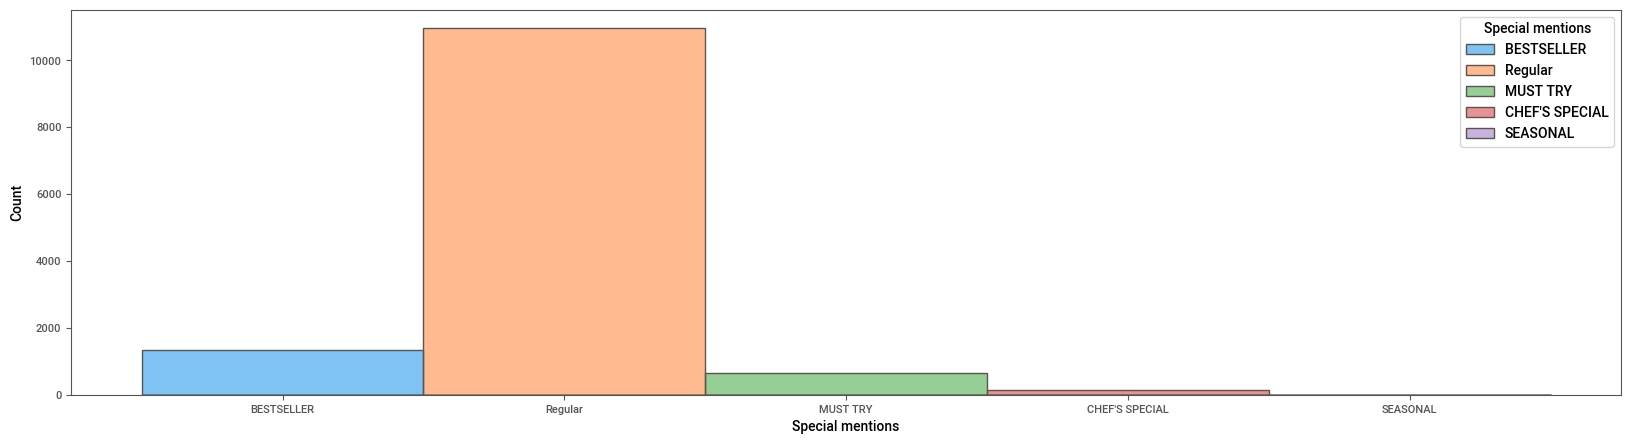

In [115]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_hyderabad,x="Special mentions",hue="Special mentions")
plt.show()

## for chennai

In [116]:
df_chennai=df[df["City"]=="Chennai"]

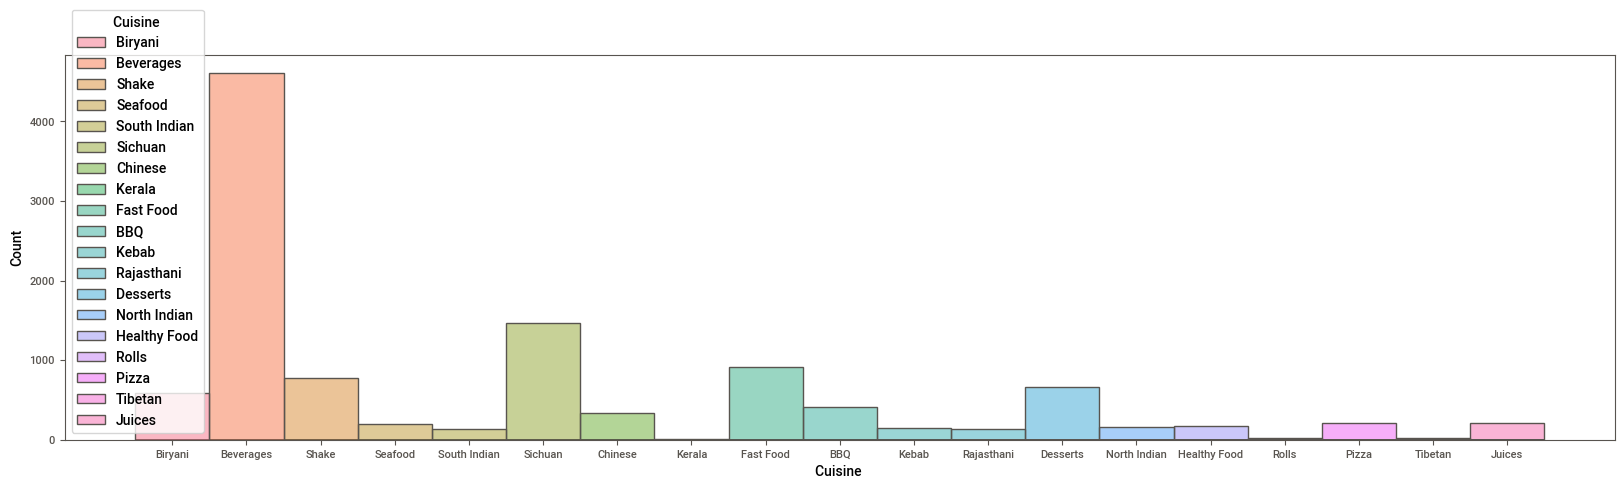

In [117]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_chennai,x="Cuisine ",hue="Cuisine ")
plt.show()

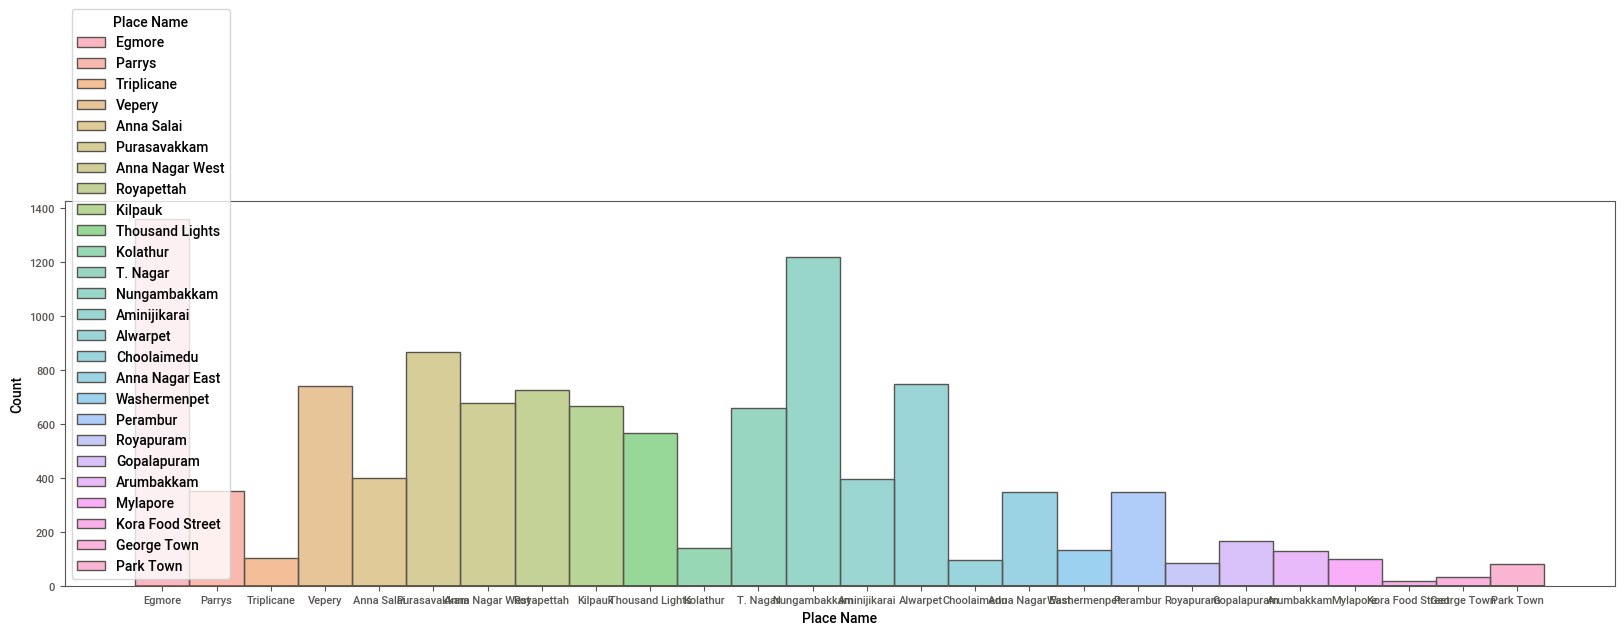

In [118]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_chennai,x="Place Name",hue="Place Name")
plt.show()

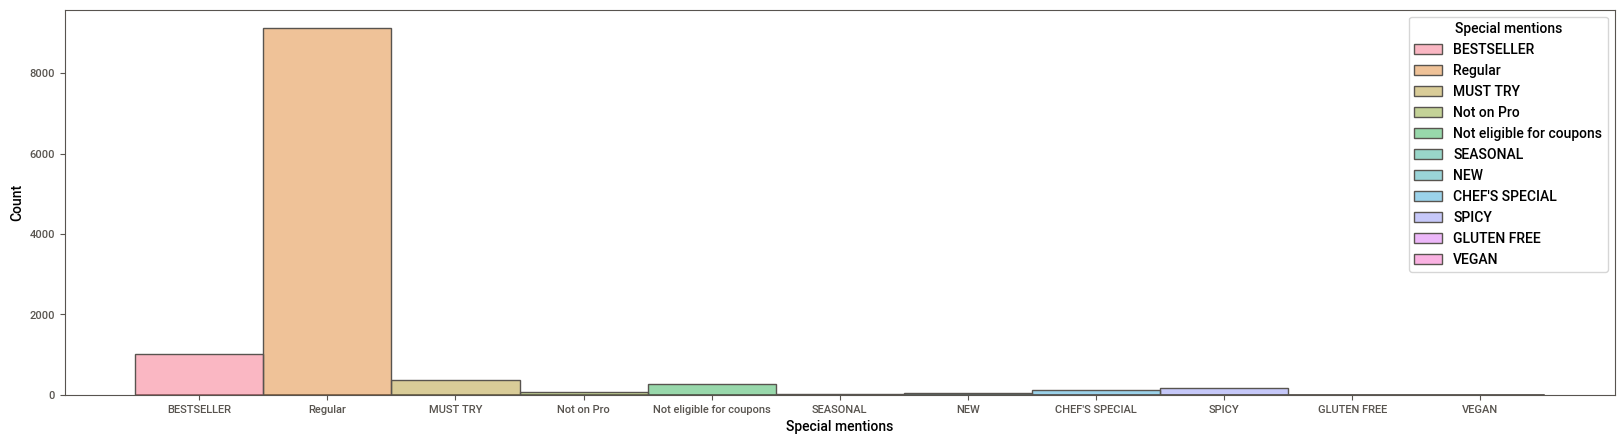

In [119]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_chennai,x="Special mentions",hue="Special mentions")
plt.show()

## For mumbai

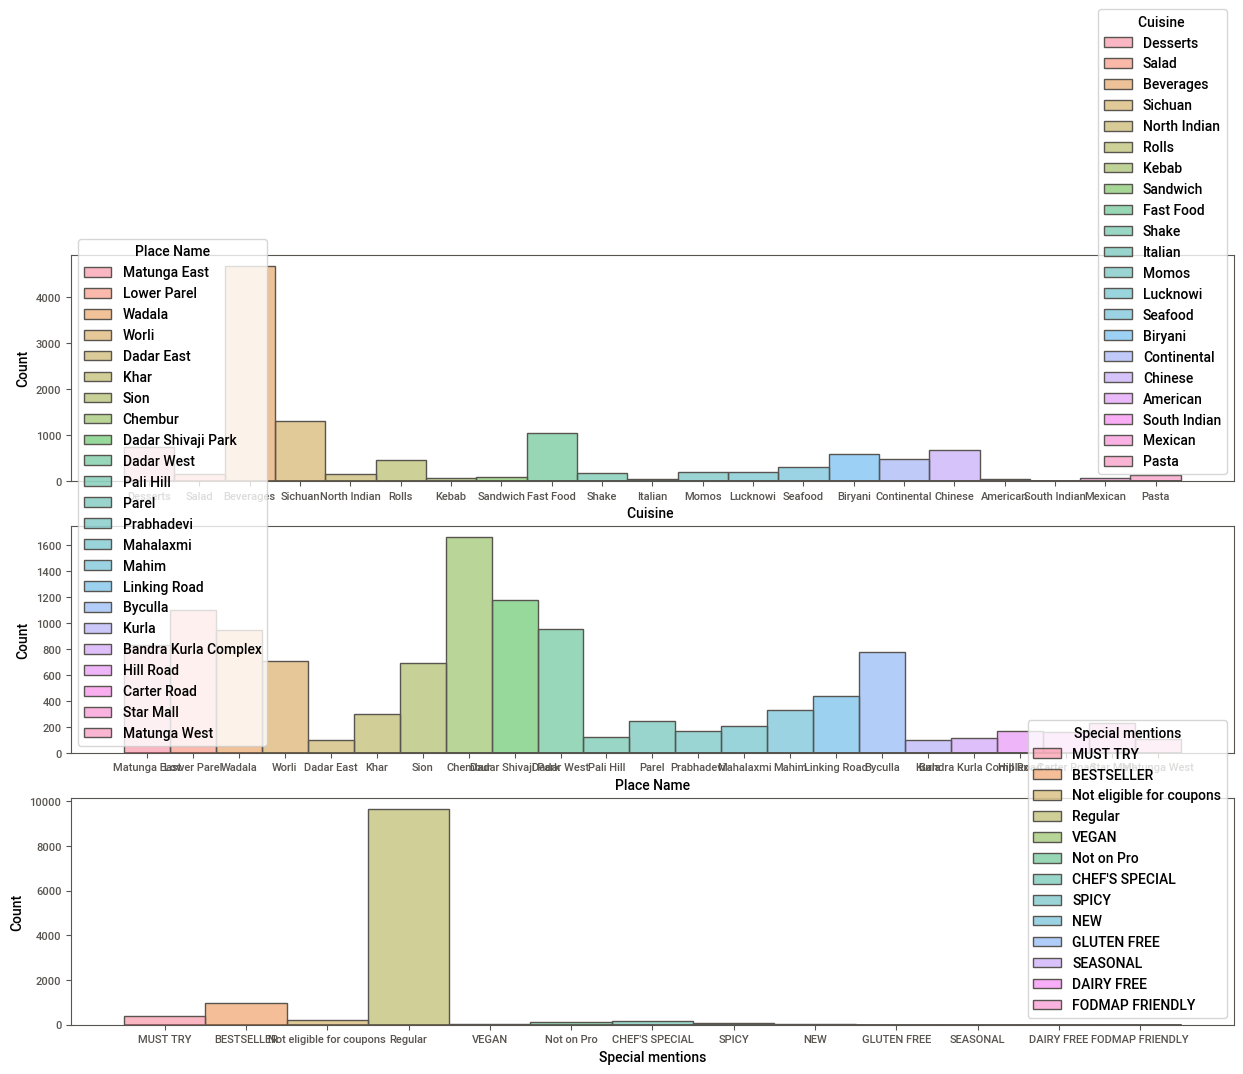

In [120]:
df_mumbai=df[df["City"]=="Mumbai"]
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.histplot(data=df_mumbai,x="Cuisine ",hue="Cuisine ")
plt.subplot(3,1,2)
sns.histplot(data=df_mumbai,x="Place Name",hue="Place Name")
plt.subplot(3,1,3)
sns.histplot(data=df_mumbai,x="Special mentions",hue="Special mentions")
plt.show()

## Bivariate analysis

In [121]:
def sct(col,i):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,i)
    sns.scatterplot(data=df,x=col,y="Prices")
    plt.show()

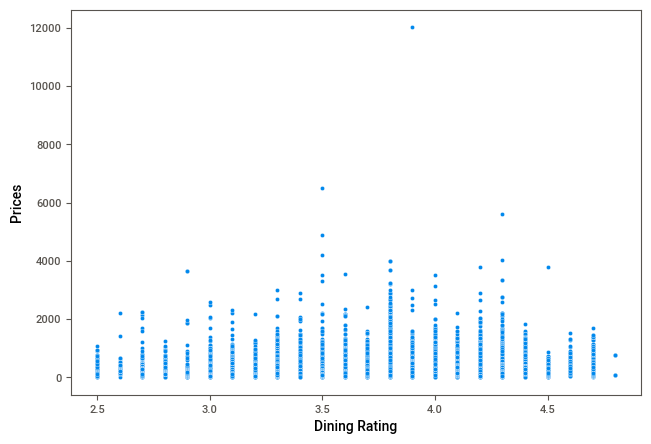

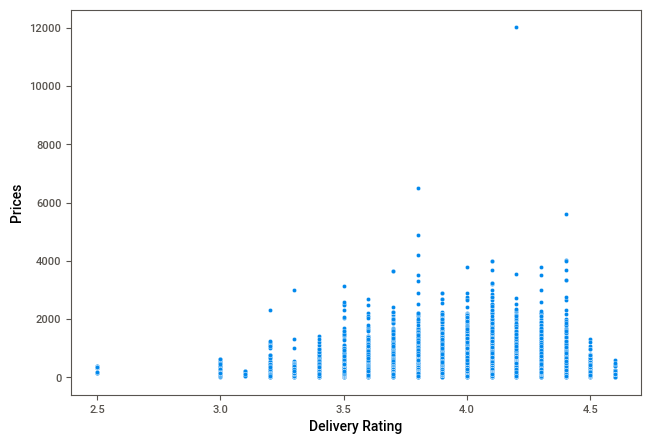

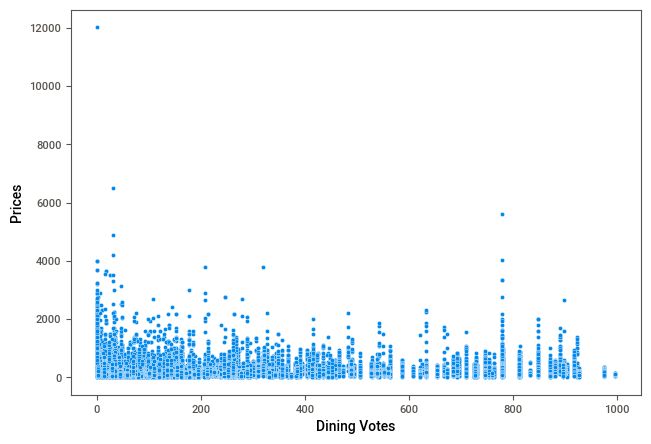

In [122]:
sct("Dining Rating",1)
sct("Delivery Rating",2)
sct("Dining Votes",3)

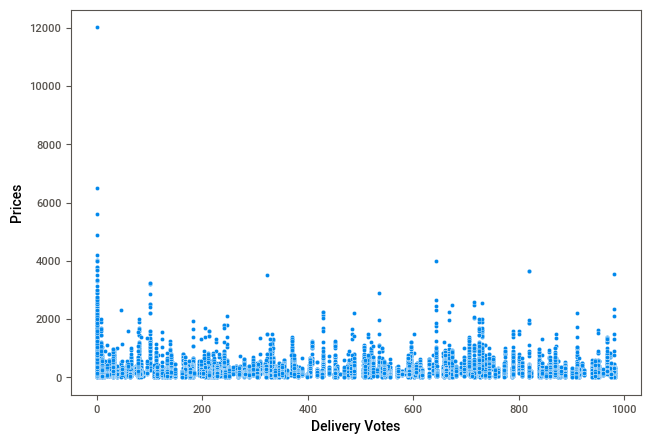

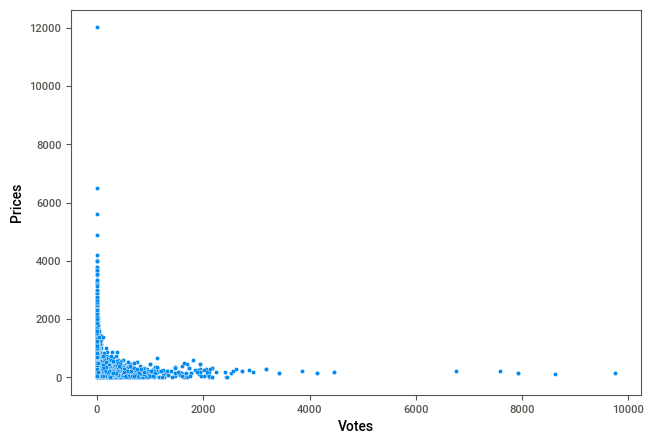

In [123]:
sct("Delivery Votes",1)
sct("Votes",2)

## In the above column we infer that the colum votes is unncessary as items with zero votes sold more, this gives wrong interpretation.

<Axes: xlabel='Prices', ylabel='Cuisine '>

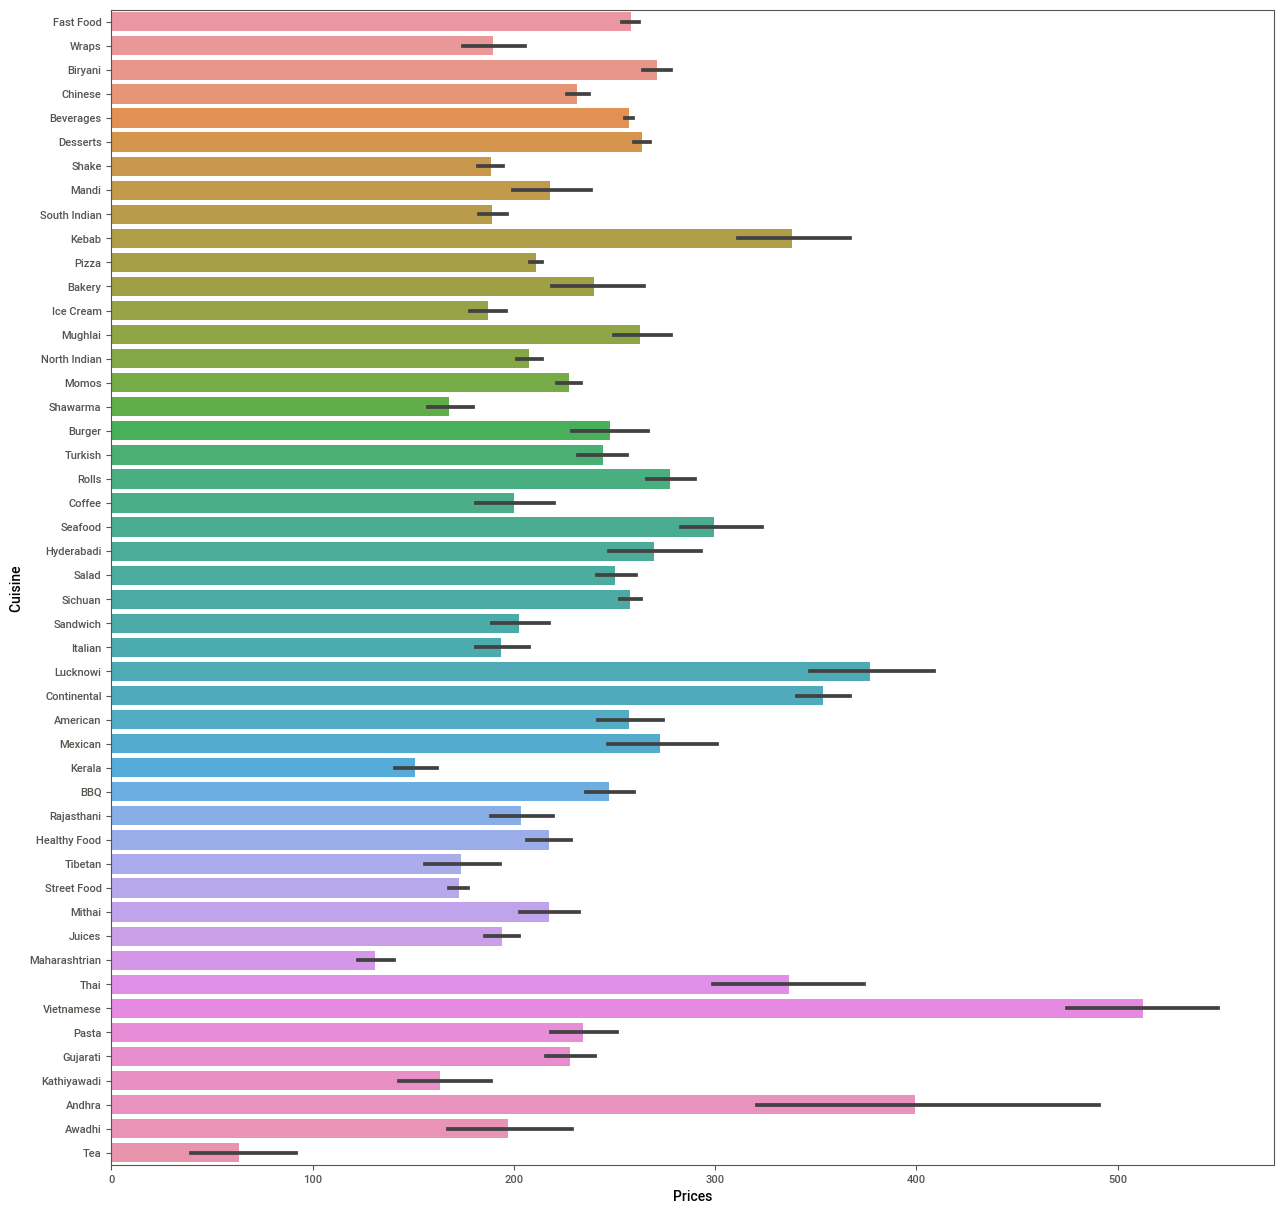

In [124]:
plt.figure(figsize=(15,15))
sns.barplot(data=df,x="Prices",y="Cuisine ")

## vietnamese and lucknowi cost more compared to other dishes

In [125]:
df=df.drop("Votes",axis=1)

In [126]:
df.head()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name       City                 Item Name  \
0               0  Fast Food   Malakpet  Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet  Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet  Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet  Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet  Hyderabad  Special Doner Wrap Combo   

   Prices Special mentions  
0   249.0       BESTSELLER  
1   129.0       BESTSELLER  
2   189.0          Regular  
3   189.0       BESTSELLER  
4   205.0         MUST TRY

In [127]:
 corr=df.corr()

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_17280\2572779251.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

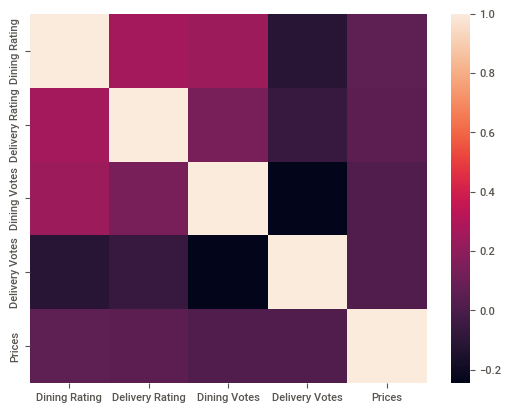

In [128]:
sns.heatmap(corr)

## multivariate analysis

In [129]:
def scat(col,i):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,i)
    sns.scatterplot(data=df,x=col,y="Prices",hue="City")
    plt.show()

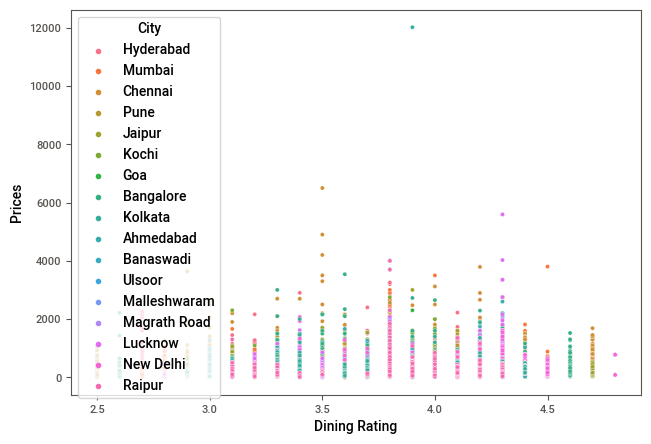

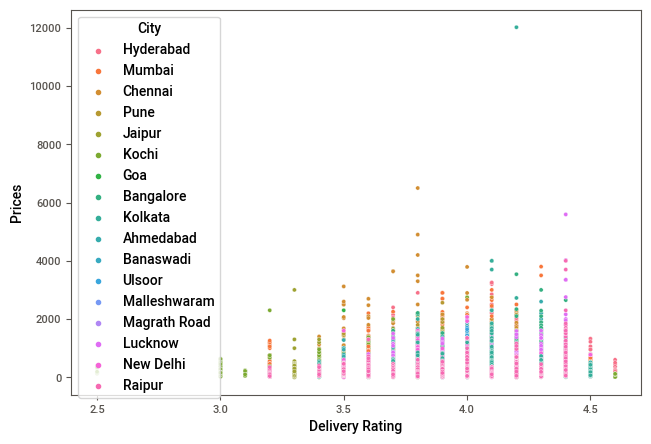

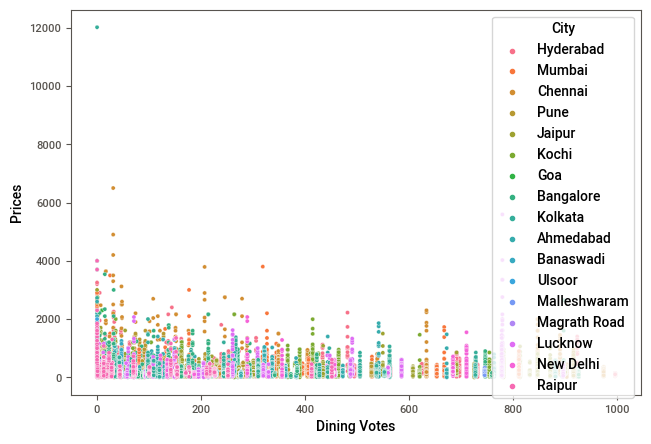

In [130]:
scat("Dining Rating",1)
scat("Delivery Rating",2)
scat("Dining Votes",3)

In [131]:
def scat_1(col,i):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,i)
    sns.scatterplot(data=df,x=col,y="Prices",hue="Special mentions")
    plt.show()

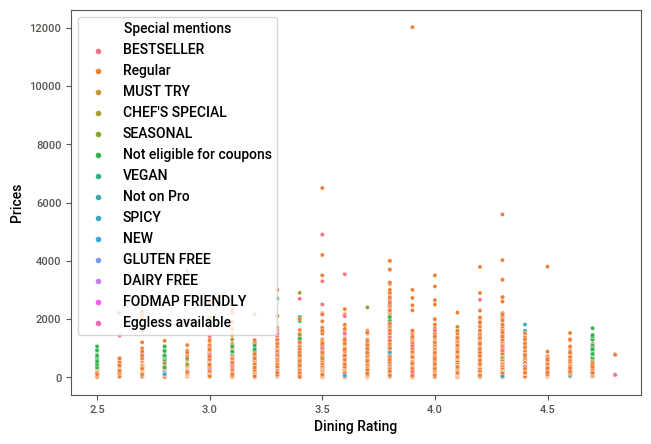

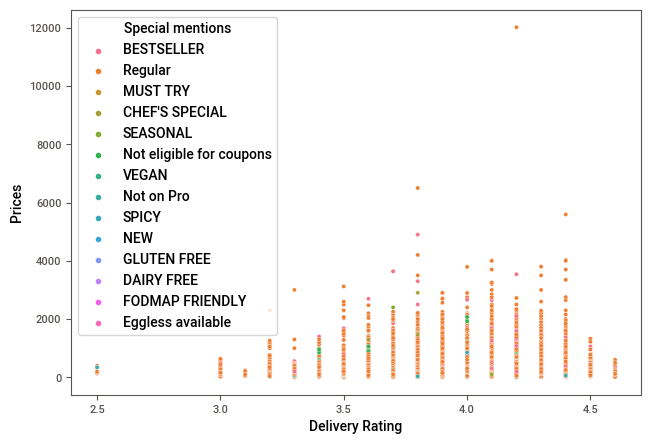

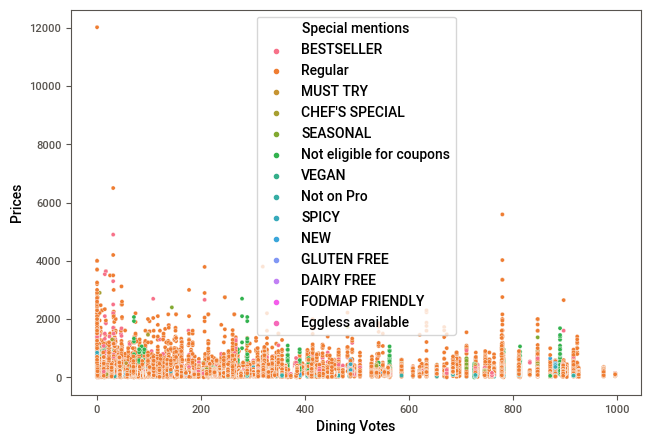

In [132]:
scat_1("Dining Rating",1)
scat_1("Delivery Rating",2)
scat_1("Dining Votes",3)

## we can easily interpret that the special mentions "Best Seller" sold the most with higher rates.

## Finding which cuisine is more rated with respect to price

In [133]:
rated=df.groupby("Cuisine ")

In [134]:
rated.mean()

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_17280\1103666212.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rated.mean()


Dining Rating  Delivery Rating  Dining Votes  Delivery Votes  \
Cuisine                                                                       
American            3.742857         4.081395      0.504983        9.129568   
Andhra              4.200000         4.300000      0.000000        0.000000   
Awadhi              4.500000         4.000000      0.000000        0.000000   
BBQ                 3.336481         3.881402     97.735336      214.499285   
Bakery              4.015739         4.121734    266.433619       79.471092   
Beverages           3.844500         4.010119    200.140959       95.554299   
Biryani             3.845494         3.907308    172.411034       82.348354   
Burger              3.690846         3.830743    100.687392      212.331606   
Chinese             3.803178         3.934445    106.206869      127.618239   
Coffee              3.644444         4.054422      2.145125      577.346939   
Continental         3.808349         3.666793      1.168880        0.000000   
Desserts            3.879935         4.029887    177.003985      101.185137   
Fast Food           3.706798         3.911232    112.139620      169.798662   
Gujarati            3.465157         3.739024     91.292683        0.000000   
Healthy Food        3.800000         4.200000      0.000000        0.000000   
Hyderabadi          3.800000         4.080743     17.199324      230.932432   
Ice Cream           3.795756         4.057867    200.534161       81.953416   
Italian             3.800000         3.512195      0.000000      529.365854   
Juices              3.827985         3.931343    165.697761       87.895522   
Kathiyawadi         3.693277         3.613445      2.000000      517.579832   
Kebab               3.788271         4.034436    183.230075      232.661654   
Kerala              3.728481         3.917722     73.136076       81.455696   
Lucknowi            3.800000         3.900000      0.000000        0.000000   
Maharashtrian       3.875433         3.630796     79.017301      186.570934   
Mandi               3.803514         3.763243    460.889189      194.227027   
Mexican             4.141379         3.986207      0.000000      322.793103   
Mithai              3.800000         4.104527      0.000000        0.000000   
Momos               3.829439         3.785981    118.460280      139.366822   
Mughlai             3.546372         3.709043     81.002103      226.930599   
North Indian        3.824836         3.991831    123.281609      131.192939   
Pasta               3.854804         3.958719     73.580071      124.953737   
Pizza               3.816078         3.944529    110.099491      116.453848   
Rajasthani          3.269091         4.081212    161.272727      393.066667   
Rolls               3.788243         3.812971     72.881789       99.275399   
Salad               3.800000         4.189078      0.911263       32.436860   
Sandwich            3.441571         3.826820     41.818008       67.000000   
Seafood             4.003972         4.056464    106.028816       70.658100   
Shake               3.923060         3.891020     60.376078       77.147270   
Shawarma            3.088535         3.694268     18.777070        0.000000   
Sichuan             3.848421         3.872382    193.055694      177.573150   
South Indian        3.728968         3.907937    188.708333       78.306878   
Street Food         3.785787         3.973218    159.099536       78.632223   
Tea                 3.800000         4.400000      0.000000        0.000000   
Thai                3.800000         4.000000      0.000000        0.000000   
Tibetan             3.900000         4.100000     99.000000        0.000000   
Turkish             4.100000         4.100000    208.000000      699.000000   
Vietnamese          3.800000         4.000000      0.000000        3.000000   
Wraps               4.172263         3.724818    112.299270      145.875912   

                   Prices  
Cuisine                    
American

## Finding which restaurant has best dining in a particular city 

In [135]:
rated_2=df.groupby(["City"])["Dining Rating"].idxmax()
rated_2=df.loc[rated_2]
rated_2

Restaurant Name  Dining Rating  Delivery Rating  \
89172               Urban Khichdi            4.6              4.1   
94473                     GOPIZZA            3.7              3.8   
65625                    Truffles            4.6              4.3   
32723   AB's - Absolute Barbecues            4.7              3.7   
63090                Ritz Classic            4.4              4.1   
15354                     Exotica            4.6              4.3   
76069              Thali and More            4.7              4.1   
56766                     Cafe 17            4.6              4.1   
72232                     Chowman            4.4              4.1   
100331                Dastarkhwan            4.5              4.0   
99791         Keventers Ice Cream            3.5              3.7   
96031                    Rajdhani            4.0              4.0   
17436                   Chaitanya            4.5              4.4   
106300          Natural Ice Cream            4.8              4.5   
43248                     Sukanta            4.2              4.1   
118057          Creams N Caffeine            4.3              3.5   
94757           Dum Safar Biryani            3.8              4.0   

        Dining Votes  Delivery Votes    Cuisine             Place Name  \
89172              0               0   Beverages           Navrangpura   
94473             47             139   Fast Food            Orion East   
65625              0               0    Desserts        St. Marks Road   
32723              0               0    Desserts              T. Nagar   
63090            105             405   Beverages           Mall De Goa   
15354              0               0   Beverages  12th Square Building   
76069              0               0   Beverages              C Scheme   
56766            259               0   Beverages             Ravipuram   
72232            882               0   Beverages             Hatibagan   
100331             0               0      Awadhi            Kaiserbagh   
99791              0             112    Desserts           Garuda Mall   
96031            746               0  Rajasthani         Mantri Square   
17436              0               0   Beverages            Dadar West   
106300             0               0   Beverages       Connaught Place   
43248              0               0   Beverages       Deccan Gymkhana   
118057           217               0       Pizza          Samta Colony   
94757              0               7    Desserts             Lido Mall   

                City                                     Item Name  Prices  \
89172      Ahmedabad                          Dal Khichdi [425 Gm]  199.00   
94473      Banaswadi                            Barbecue Veg Pizza  295.00   
65625      Bangalore                     Dutch Truffle Cake 1/2 Kg  666.67   
32723        Chennai          Biryani & Chicken Tikka [ Serves-1 ]  295.00   
63090            Goa                                Prawns Biryani  480.00   
15354      Hyderabad                       Paneer Tikka Mirch Wala  695.00   
76069         Jaipur                                Standard Thali  210.00   
56766          Kochi                             Veg alfredo pasta  280.00   
72232        Kolkata                              Shanghai Noodles  200.00   
100331       Lucknow                                Chicken Masala  225.00   
99791   Magrath Road           Triple Chocolate Ice cream [450 ml]  278.81   
96031   Malleshwaram                              Special Meal Box  250.00   
17436         Mumbai                                   Prawns Rice  330.00   
106300     New Delhi                      Tender Coconut Ice Cream   79.24   
43248           Pune                                    Mini Thali  238.10   
118057        Raipur                  Cheese Corn Pizza [7 inches]  190.00   
94757         Ulsoor  Overload Paneer Tikka Dum Biryani (Serves 1)  419.00   

       Special mentions  
89172      

## To determine which restaurant tops a particular place in a city

In [136]:
rated_2=df_chennai.groupby(["Place Name"])["Dining Rating"].idxmax()
rated_2=df_chennai.loc[rated_2]
rated_2

Restaurant Name  Dining Rating  \
36171                              Eating Circles            4.6   
31626                                  WOW! China            4.0   
37719                 Kim Ling Chinese Restaurant            4.3   
38147                Chidambaram New Moorthy Cafe            4.3   
29177                              Hotel Sennthur            3.8   
36886                             Armaani Biryani            3.8   
33309                             Zam Zam Briyani            3.3   
28327                      Babal Da Punjabi Dabha            4.4   
38970                             Taste Of Turkey            3.8   
35861                          The Kati Roll Shop            4.2   
33804                             Hotel Paramount            4.1   
30704              Bismillah Briyani & Fast Foods            3.9   
38127  Tibet Momo - World Class Pan Asian Cuisine            3.9   
37343                                 Gusto Pizza            3.8   
37148                                     Toscano            4.7   
69134                                         KFC            3.6   
28220                    Madurai Sri Thevar Hotel            3.8   
36923                                Tower Burger            3.8   
33426                           Shree Konar Vilas            4.3   
35186                                   Cafe Amin            4.1   
35762                                     Jango'z            3.9   
32723                   AB's - Absolute Barbecues            4.7   
30109                           Savoury Sea Shell            4.0   
27894                  Salem RR Biriyani Unavagam            4.0   
28714                             Liza Restaurant            3.9   
34078                              Grill A Delics            4.1   

       Delivery Rating  Dining Votes  Delivery Votes      Cuisine   \
36171              4.1           875               0  South Indian   
31626              3.8            77             709       Seafood   
37719              4.3           539               0     Beverages   
38147              4.1           246               0     Beverages   
29177              4.2           171               0     Beverages   
36886              3.6             0              84       Seafood   
33309              3.4            24               0  North Indian   
28327              4.2           405               0     Beverages   
38970              4.3             0             258         Kebab   
35861              4.0           422               0         Kebab   
33804              4.2           975               0     Beverages   
30704              3.8           176               0       Sichuan   
38127              4.1            99               0       Tibetan   
37343              3.8             0              77     Fast Food   
37148              4.1           891               0     Beverages   
69134              3.8             0              32     Fast Food   
28220              3.7           112               0  South Indian   
36923              3.7             0              64     Beverages   
33426              3.9           208               0       Biryani   
35186              4.2           260               0     Beverages   
35762              3.6             7             674     Fast Food   
32723              3.7             0               0      Desserts   
30109              4.1           848               0       Sichuan   
27894              3.5            47               0       Seafood   
28714              4.1           141               0     Beverages   
34078              3.8           142             303     Beverages   

             Place Name     City  \
36171          Alwarpet  Chennai   
31626      Aminijikarai  Chennai   
37719   Anna Nagar East  Chennai   
38147   Anna Nagar West  Chennai   
29177        Anna Salai  Chennai   
36886        Arumbakkam  Chennai   
33309       Choolaimedu  Chennai   
28327            E

## Similary it goes for other cities in the dataset

In [74]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [75]:
fc=sweetviz.FeatureConfig(force_cat="Prices")

In [76]:
myreport=sweetviz.analyze(df,None,fc)

C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and wil

In [77]:
myreport.show_html("Zomato_Analysis.html")

Report Zomato_Analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Carrying the refined dataset to out repository

In [78]:
df.to_csv("zomato_dataset_refined.csv")